In [1]:
%%capture
!pip install -U spacy
!python -m spacy download es_core_news_sm
!pip install pyspellchecker

In [2]:
import pandas as pd
import numpy as np
import gensim
import nltk
nltk.download('punkt')
!git clone https://github.com/deliasgp/nlp_use.git
%cd nlp_use/
import normalizar_texto as nt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Cloning into 'nlp_use'...
remote: Enumerating objects: 49, done.
remote: Counting objects: 100% (49/49), done.
remote: Compressing objects: 100% (44/44), done.
remote: Total 49 (delta 22), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (49/49), 881.11 KiB | 2.06 MiB/s, done.
/content/nlp_use


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Introducción
La propuesta contempla los siguientes algoritmos.


1.   Clasificación sobre de comentarios que indiquen 'ninguna observacion' 
2.   Topic módeling de los comentarios no clasificados como ninguna 'observación'



In [3]:
obs_dir = '/content/drive/MyDrive/dgavidia_minedu/BD USE/NLP/TABLETAS/Output/clasificacion visual/20230104/obs_recepcion_20230104.xlsx'
datos = pd.read_excel(obs_dir)

In [4]:
stopword_list = nltk.corpus.stopwords.words('spanish')
stop_words_tablets = nt.stop_words_use(local_file=False,maindir='') + stopword_list + ['estudiante','padre','madre','padres','madres']

In [5]:
eliminar_stop_words = ['no','si','solo','se']
for word in eliminar_stop_words:
    if word in stop_words_tablets:
        stop_words_tablets.remove(word)

In [6]:
datos.head(10)

,Número,CODIGO_MODULAR,OBSERVACION_RECEPCION,flg_cat,flg_bin,flg_motivo,flg_nombre
0,4141,1324920,SOLO LLEGÓ UN CARGADOR SOLAR,1,0,0,0
1,4661,1562008,LA TABLET CON CODIGO Q10L2102382003 LLEGO SIN ...,1,0,0,0
2,2574,602441,FALTA CARGADOR SOLAR,1,0,0,0
3,5094,380410,Solo llegó una tableta que es insuficiente pa...,1,0,1,0
4,1224,379024,FALTO PARA DOS ALUMNOS UNO PARA QUINTO GRADO Y...,1,0,0,0
5,1223,378836,Se requiere el incremento para los estudiantes...,1,0,0,0
6,4659,1559046,No llegaron la cantidad de tabletas para todos...,1,0,0,0
7,2577,606590,Los cargadores solares llegaron en cantidades ...,1,0,1,0
8,1220,378638,Faltan 3 tabletas para estudiantes y 1 tableta...,1,0,0,0
9,2578,606970,FALTO 3 ESTUDIANTE DE CUARTO GRADO DE PRIMARIA...,1,0,0,0


## Limpieza de datos
Se aplican 7 funciones que estandarizan y reducen los palabras necesarias para realizar los modelos

In [7]:
%%time
text_corpus = nt.normalizar_texto(datos['OBSERVACION_RECEPCION'],
                                    contraction_expansion=True,
                                    accented_char_removal=True, 
                                    text_lower_case=True, 
                                    text_stemming=False, text_lemmatization=True, 
                                    special_char_removal=True, remove_digits=True,
                                    stopword_removal=True, special_cases = True,
                                    autocorrecion=False,
                                    stopwords = stop_words_tablets)

CPU times: user 1min 17s, sys: 256 ms, total: 1min 17s
Wall time: 1min 33s


In [8]:
from normalizar_texto import palabras_repetidas
texto_limpio = []
for doc in text_corpus:
    word = palabras_repetidas(doc)
    texto_limpio.append(word)

In [9]:
#obs_asigna_dir_export = '/content/drive/MyDrive/dgavidia_minedu/BD USE/NLP/TABLETAS/Input/observaciones/20230104/obs_asigna_clean.xlsx'
#datos['obs'] = asigna_corpus
#datos.to_excel(obs_asigna_dir_export)
#datos = pd.read_excel(obs_asigna_dir_export)

In [10]:
nt.normalizar_texto(['Se requiere el incremento para los '],
                                    contraction_expansion=True,
                                    accented_char_removal=True, 
                                    text_lower_case=True, 
                                    text_stemming=False, text_lemmatization=True, 
                                    special_char_removal=True, remove_digits=True,
                                    stopword_removal=True, special_cases = True,
                                    autocorrecion=False,
                                    stopwords = stop_words_tablets)

['él requerir incremento']

In [11]:
datos['obs'] = texto_limpio
datos['target'] = np.where(datos.flg_cat==97,1,0)

In [12]:
datos['target'].value_counts()

0    3551
1    2008
Name: target, dtype: int64

In [13]:
datos.head(10)

,Número,CODIGO_MODULAR,OBSERVACION_RECEPCION,flg_cat,flg_bin,flg_motivo,flg_nombre,obs,target
0,4141,1324920,SOLO LLEGÓ UN CARGADOR SOLAR,1,0,0,0,solo llego cargador solar,0
1,4661,1562008,LA TABLET CON CODIGO Q10L2102382003 LLEGO SIN ...,1,0,0,0,tableto codigo llego cargador,0
2,2574,602441,FALTA CARGADOR SOLAR,1,0,0,0,falta cargador solar,0
3,5094,380410,Solo llegó una tableta que es insuficiente pa...,1,0,1,0,solo llego tableto insuficiente iv v ciclo no ...,0
4,1224,379024,FALTO PARA DOS ALUMNOS UNO PARA QUINTO GRADO Y...,1,0,0,0,falta,0
5,1223,378836,Se requiere el incremento para los estudiantes...,1,0,0,0,él requerir incremento completar total tableta,0
6,4659,1559046,No llegaron la cantidad de tabletas para todos...,1,0,0,0,no llegar cantidad tableto educacion acuerdo n...,0
7,2577,606590,Los cargadores solares llegaron en cantidades ...,1,0,1,0,cargador solar llegar cantidad completa faltar,0
8,1220,378638,Faltan 3 tabletas para estudiantes y 1 tableta...,1,0,0,0,falta tableto tableta,0
9,2578,606970,FALTO 3 ESTUDIANTE DE CUARTO GRADO DE PRIMARIA...,1,0,0,0,faltar aula,0


##  Definiendo datos de entrenamiento y de prueba

In [14]:
#train_test_split(data.drop(columns=['target']), data['target'], test_size=0.2, random_state=42)
from sklearn.model_selection import train_test_split
train_corpus, test_corpus, train_label_nums, test_label_nums = train_test_split(
    datos['obs'], #np.array(datos['obs'])
    datos['target'], #np.array(datos['target'])
    test_size=1/3, random_state=42)

In [15]:
index_train = train_corpus.index
index_test = test_corpus.index

In [16]:
train_corpus, test_corpus, train_label_nums, test_label_nums = train_test_split(
    np.array(datos['obs']), #datos['obs']
    np.array(datos['target']), #datos['target']
    test_size=1/3, random_state=42)

# Entrenamiento de modelo de clasificación

In [17]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(binary=False, min_df=0.0, max_df=1.0)
cv_train_features = cv.fit_transform(train_corpus)
cv_test_features = cv.transform(test_corpus)

In [18]:
#cv_matrix = cv_train_features.toarray()
#vocab_bag_of_words = cv.get_feature_names_out()
#cv_matrix = pd.DataFrame(cv_matrix, columns=vocab_bag_of_words)
#cv_matrix = np.sum(cv_matrix,axis=0)

In [19]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
lr = LogisticRegression(penalty='l2', max_iter=100, C=1, random_state=42)
lr.fit(cv_train_features, train_label_nums)
#------------------------------------------------------------------------------*
lr_bow_cv_scores = cross_val_score(lr, cv_train_features, train_label_nums, cv=5)
lr_bow_cv_mean_score = np.mean(lr_bow_cv_scores)

## Métricas de precisión

In [20]:
lr_bow_cv_scores = cross_val_score(lr, cv_train_features, train_label_nums, cv=5)
lr_bow_cv_mean_score = np.mean(lr_bow_cv_scores)
print('CV Accuracy (5-fold):', lr_bow_cv_scores)
print('Mean CV Accuracy:', lr_bow_cv_mean_score)
lr_bow_test_score = lr.score(cv_test_features, test_label_nums)
print('Test Accuracy:', lr_bow_test_score)

CV Accuracy (5-fold): [0.9097035  0.91497976 0.92712551 0.90958165 0.92577598]
Mean CV Accuracy: 0.917433278406466
Test Accuracy: 0.9276848354020507


In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Obtener las probabilidades predichas y las verdaderas etiquetas
y_prob = lr.predict_proba(cv_test_features)[:, 1]
y_true = test_label_nums
print(len(y_prob))

1853


Curva roc y corte óptimo

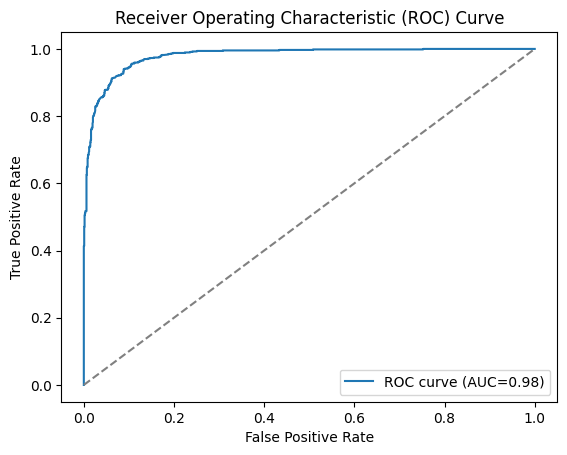

Optimal threshold: 0.41


In [22]:
# Calcular la curva ROC
fpr, tpr, thresholds = roc_curve(y_true, y_prob)

# Calcular el área bajo la curva ROC
auc = roc_auc_score(y_true, y_prob)

# Graficar la curva ROC
plt.plot(fpr, tpr, label=f'ROC curve (AUC={auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Encontrar el punto de corte óptimo
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f'Optimal threshold: {optimal_threshold:.2f}')

In [23]:
optimal_threshold

0.4148418840842973

In [24]:
ninguna_observacion = y_prob>optimal_threshold
fitted_data = pd.DataFrame()
fitted_data['obs'] = test_corpus
fitted_data['target'] = test_label_nums
fitted_data['ninguna_observacion'] = ninguna_observacion

In [25]:
pd.crosstab(fitted_data['target'],fitted_data['ninguna_observacion'])

ninguna_observacion,False,True
target,,
0,1083,105
1,41,624


In [27]:
!pip freeze > requirements.txt

In [28]:
from google.colab import files
files.download('requirements.txt')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [26]:
fitted_data.head(10)

,obs,target,ninguna_observacion
0,novedad,1,True
1,cargador solar buen,1,True
2,él recepciono diar,1,True
3,falta tableto,0,False
4,cargador traer casa ahi entregar director hosp...,0,False
5,él recepciono conforme,1,True
6,no él poder registrar plazo motivo inaccesibil...,0,False
7,registro tableto solo él poder registrar table...,0,False
8,él dar sobrante tableta correspondiente pecós n,0,False
9,falta tableto,0,False


# Topic Modeling

In [ ]:
datos_topic = datos.copy()
datos_topic = datos_topic[datos_topic['flg_cat']!=97]
print(datos_topic.shape)

In [ ]:
train_corpus, test_corpus, train_label_nums, test_label_nums = train_test_split(
    datos_topic['obs'], #np.array(datos['obs'])
    datos_topic['target'], #np.array(datos['target'])
    test_size=1/3, random_state=42)

index_train_topic = train_corpus.index
index_test_topic = test_corpus.index

In [ ]:
train_corpus, test_corpus, train_label_nums, test_label_nums = train_test_split(
    np.array(datos_topic['obs']), 
    np.array(datos_topic['flg_cat']),
    test_size=1/3, random_state=42)

In [ ]:
datos_topic.head(10)

In [ ]:
#norm_asigna = datos['obs']

In [ ]:
import nltk
nltk.download('punkt')
# Lista de oraciones de ejemplo

In [ ]:
# Tokenizar las oraciones
text_tokens = [nltk.word_tokenize(sentence) for sentence in train_corpus]
bigram_model = gensim.models.phrases.Phrases(text_tokens, min_count=1, threshold=1)
#min_count (float, optional) – Ignore all words and bigrams with total collected count lower than this value.
#threshold (float, optional) – Represent a score threshold for forming the phrases (higher means fewer phrases). 
#A phrase of words a followed by b is accepted if the score of the phrase is greater than threshold. Heavily depends on concrete scoring-function, 
#see the scoring parameter.

In [ ]:
norm_corpus_bigrams = [bigram_model[doc] for doc in text_tokens]

# Create a dictionary representation of the documents.
dictionary = gensim.corpora.Dictionary(norm_corpus_bigrams)
print('Sample word to number mappings:', list(dictionary.items())[:100])
print('Total Vocabulary Size:', len(dictionary))

In [ ]:
# Transforming corpus into bag of words vectors
bow_corpus = [dictionary.doc2bow(text) for text in norm_corpus_bigrams]

In [ ]:
stoplist = stop_words_tablets
documents = train_corpus
texts = [
    [word for word in document.lower().split() if word not in stoplist]
    for document in documents
]

Número óptimo de tópicos

In [ ]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel

In [ ]:
%%time
min_topics = 15
max_topics = 30

# Definir una lista para almacenar los resultados
coherence_scores = []
models = []
# Iterar sobre los números de tópicos y calcular la coherencia
for num_topics in range(min_topics, max_topics + 1):

    lda_model = gensim.models.LdaModel(corpus=bow_corpus, id2word=dictionary,
                                   chunksize=1740, alpha='auto',
                                   eta='auto', random_state=42,
                                   iterations=500, num_topics=num_topics,
                                   passes=20, eval_every=None)
    
    coherence_model = CoherenceModel(model=lda_model, texts=norm_corpus_bigrams, corpus=bow_corpus, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append((num_topics, coherence_score))
    models.append(lda_model)

# Crear un dataframe a partir de los resultados
df = pd.DataFrame(coherence_scores, columns=['Número de Tópicos', 'Coherencia'])

# Imprimir el dataframe
print(df)

In [ ]:
import matplotlib.pyplot as plt

# Crear un gráfico de línea para los resultados
plt.plot(df['Número de Tópicos'], df['Coherencia'], marker='o')

# Añadir etiquetas y título al gráfico
plt.xlabel('Número de Tópicos')
plt.ylabel('Coherencia')
plt.title('Relación entre el número de tópicos y la coherencia')

# Mostrar el gráfico
plt.show()

Obteniendo el máximo número de tópicos

In [ ]:
max_coherence_row = df.loc[df['Coherencia'].idxmax()]
num_topics_max_coherence = max_coherence_row['Número de Tópicos']

topn = 20
opt_topic  = num_topics_max_coherence
best_model_idx = df[df['Número de Tópicos'] == opt_topic].index[0]
best_lda_model = models[best_model_idx]
best_lda_model.num_topics

In [ ]:
for topic_id, topic in best_lda_model.print_topics(num_topics=opt_topic, num_words=topn):
  print('Topic #'+str(topic_id+1)+':')
  print(topic)
  print()

In [ ]:
topics = [[(term, round(wt, 3)) 
               for term, wt in best_lda_model.show_topic(n, topn=topn)] 
                   for n in range(0, best_lda_model.num_topics)]

for idx, topic in enumerate(topics):
    print('Topic #'+str(idx+1)+':')
    print([term for term, wt in topic])
    print()

In [ ]:
topics_df = pd.DataFrame([[term for term, wt in topic] for topic in topics], 
                         columns = ['Term'+str(i) for i in range(1, topn+1)],
                         index=['Topic '+str(t) for t in range(1, best_lda_model.num_topics+1)]).T
topics_df                                                         

In [ ]:
pd.set_option('display.max_colwidth', -1)
topics_df = pd.DataFrame([', '.join([term for term, wt in topic])  
                              for topic in topics],
                         columns = ['Terms per Topic'],
                         index=['Topic'+str(t) for t in range(1, best_lda_model.num_topics+1)]
                         )
topics_df

Se genera el siguiente prompt en GPT y se redactáron las siguientes categorías

En un proyecto de distribución a tabletas se registráron los comentarios de directores de escuelas sobre la recepción de las tabletas.
Los tópicos generados son:

Redacta oraciones que resuman cada tópico.


Topic 1: Falta de tabletas, traslado y configuración.

Topic 2: Entrega de tabletas y distribución en zonas rurales.

Topic 3: Recepción de tabletas y programación escolar.

Topic 4: Problemas de entrega, verificación y observaciones sobre 
funcionamiento.

Topic 5: Cantidad de tabletas, necesidades de matriculados y problemas con cargadores solares.

Topic 6: Problemas de encendido, acceso y plan de datos.

Topic 7: Falta de entrega, identificación de beneficiarios y registro.

Topic 8: Problemas de chips y falta de funcionamiento de tabletas.

Topic 9: Errores en dispositivos, necesidad de actualización y problema de conectividad.

Topic 10: Recepción de tabletas, necesidad de cargadores solares y devolución de dispositivos.

Topic 11: Problemas técnicos de tabletas, caso de San y redistribución de dispositivos.

Topic 12: Falta de cargadores solares y encendido de tabletas.

Topic 13: Asignación de tabletas, nivel educativo y falta de conectividad.

Topic 14: Fecha de entrega de tabletas, asignación y lista de beneficiarios.

Topic 15: Entrega y recepción de tabletas, verificación de contenido y sistema de registro.

Topic 16: Problemas técnicos de tabletas y falta de plan de datos y cargadores solares.

Topic 17: Falta de chips, tercer par y entrega de dispositivos.


Topic 18: Falta de cargadores solares y problema de energía eléctrica.

Topic 19: Cantidad de tabletas y asignación a matriculados.

Topic 20: Entrega de tabletas y asignación de operadores y direcciones.

Topic 21: Falta de entregas e insuficiencia de cargadores solares.

Topic 22: Falta de entrega de tabletas y ubicación de las mismas.

Topic 23: Recepción de tabletas, cargadores solares, falta de fluido eléctrico y verificación.

In [ ]:
tm_results = best_lda_model[bow_corpus]
corpus_topics = [sorted(topics, key=lambda record: -record[1])[0] 
                     for topics in tm_results]

In [ ]:
corpus_topic_df = pd.DataFrame()
corpus_topic_df['Document'] = range(0, len(norm_corpus_bigrams))
corpus_topic_df['Dominant Topic'] = [item[0]+1 for item in corpus_topics]
corpus_topic_df['Contribution %'] = [round(item[1]*100, 2) for item in corpus_topics]
corpus_topic_df['Topic Desc'] = [topics_df.iloc[t[0]]['Terms per Topic'] for t in corpus_topics]
corpus_topic_df['Paper'] = norm_corpus_bigrams



In [ ]:
#corpus_topic_df['Dominant Topic'].value_counts()
#pd.isnull(corpus_topic_df['Dominant Topic']).sum()
print(len(corpus_topic_df['Dominant Topic']))
print(len(index_train_topic))

## Fit Topic

In [ ]:
data_topic_fit = datos.iloc[index_train_topic]
data_topic_fit['obs'] = train_corpus
#data_topic_fit['Target_2'] = train_label_nums
data_topic_fit['Topic'] = corpus_topic_df['Dominant Topic']
#pd.crosstab(data_topic_fit['Topic'],data_topic_fit['Target_2'])

In [ ]:
data_topic_fit.head(10)

In [ ]:
#datos_comp['Topic'] = np.where((datos_comp.OBSERVACION_RECEPCION.str.contains('(?i)(fal|solo|mal estado|malog)')) & (datos_comp['Topic']==10),5,datos_comp['Topic'])
#datos_comp['Topic'] = np.where((datos_comp.OBSERVACION_RECEPCION.str.contains('(?i)(ning)(.+)(obs|noved)(.+)')),10,datos_comp['Topic'])
#datos_comp['Topic'] = np.where((datos_comp.OBSERVACION_RECEPCION.str.contains('(?i)(no hay observ)(.+)')),10,datos_comp['Topic'])
#datos_comp['Topic'] = np.where((datos_comp.OBSERVACION_RECEPCION.str.contains('(?i)(buen)(.+)(estado)(.+)')) &
#                               (datos_comp.OBSERVACION_RECEPCION.str.contains('(?i)(no|devol|sin|falt|falla|pero|malograda)')==False),
#                               10,datos_comp['Topic'])

In [ ]:
temp_analisis = data_topic_fit[((data_topic_fit['Topic']==1)) & (data_topic_fit['Target_2']==3)]
temp_analisis.iloc[:30]

In [ ]:
temp

In [ ]:
temp_export_dir = '/content/drive/MyDrive/dgavidia_minedu/BD USE/NLP/data_topic_fit.xlsx'
data_topic_fit.to_excel(temp_export_dir)

In [ ]:
datos.shape